In [1]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 3.0 MB/s eta 0:00:00


In [2]:
# import libraries
import pandas as pd
import numpy as np
import re
import emoji
import nltk
import string

nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MY ML PROJECTS/FlipKart Sentiment Analysis/flipkart_data.csv')
df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


* NAN Values
* Punctuation Numbers
* Emojis
* Duplicates
* lowercasing
* Stopwords
* lemitaizeation

In [4]:
df.shape

(9976, 2)

In [5]:
# Checaking Missing Values
df.isnull().sum()

review    0
rating    0
dtype: int64

In [6]:
# Headling Duplicated Values
df.duplicated().sum()

2108

In [7]:
# Delete duplicates Values
df.drop_duplicates(subset = ["review"],inplace = True)

In [8]:
df.shape

(7694, 2)

In [9]:
df["rating"].value_counts(1)*100

5    55.744736
4    23.225890
3     9.409930
1     8.084221
2     3.535222
Name: rating, dtype: float64

In [10]:
df["sentiment"] = np.where(df["rating"] >= 4,0,1 )

In [11]:
df['sentiment'].value_counts()

0    6076
1    1618
Name: sentiment, dtype: int64

In [12]:
positive_df = df[df["sentiment"] == 0].sample(3000,random_state = 42)
negitive_df = df[df["sentiment"] == 1 ]
df= pd.concat([positive_df,negitive_df])
df["sentiment"].value_counts(1)

0    0.649632
1    0.350368
Name: sentiment, dtype: float64

In [13]:
df.head()

,review,rating,sentiment
791,The Boat Rockerz 400 have awesome bass and sup...,4,0
4046,It's really amazing.. i love it.. tysm boat ro...,4,0
6710,The product was is good For this price segment...,4,0
4771,Sound quality like a ordenery headphoneREAD MORE,4,0
6827,The headphones are excellent as expected..The ...,5,0


In [14]:
# shuffle Df
df = df.sample(frac = 1,random_state= 42)

In [16]:
with open("/content/drive/MyDrive/MY ML PROJECTS/FlipKart Sentiment Analysis/sw_new.txt","r") as f:
  sw_new = f.read()
sw_new = sw_new.split("\n")
sw_new


['himself',
 'very',
 'was',
 'other',
 'that',
 'down',
 'this',
 'why',
 'your',
 "she's",
 'before',
 'same',
 'here',
 'm',
 "you'll",
 'my',
 "you're",
 'how',
 'then',
 'having',
 'from',
 'because',
 'our',
 'ours',
 'just',
 'as',
 "you'd",
 've',
 'ourselves',
 'which',
 'his',
 'at',
 'doesn',
 'ma',
 'up',
 'all',
 'yourself',
 'while',
 'by',
 'herself',
 'into',
 'some',
 't',
 'hers',
 'below',
 'there',
 'each',
 'these',
 'couldn',
 'do',
 "should've",
 'been',
 'than',
 'in',
 'i',
 'whom',
 'does',
 'yours',
 'those',
 'o',
 'over',
 'we',
 'above',
 'he',
 'doing',
 'to',
 'll',
 'its',
 'such',
 'further',
 'it',
 'and',
 'too',
 'on',
 'who',
 'y',
 'were',
 'or',
 'am',
 'theirs',
 'after',
 'for',
 'you',
 'an',
 'out',
 'him',
 'me',
 'off',
 'under',
 'most',
 'should',
 'them',
 'now',
 'what',
 'so',
 'd',
 'can',
 'with',
 "it's",
 'she',
 'any',
 'did',
 'themselves',
 'own',
 'only',
 "you've",
 'will',
 'the',
 'itself',
 'both',
 're',
 'about',
 'of',
 

In [17]:
def text_cleaner(text, sw = sw_new):
  import re
  import emoji
  import string
  from nltk.stem import PorterStemmer,WordNetLemmatizer

  # mobile_regex = "(\+*)((0[ -]*)*|((91 )*))((\d{12})+|(\d{10})+)|\d{5}([- ]*)\d{6}"
  url_regex = "((http|https|www)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
  space_regex = "\s\s+"
  # remove url
  text = re.sub(url_regex, "", text)
  # remove mobile
  # text = re.sub(mobile_regex, "", text)
  # lower casing
  text = text.lower()
  # remove emoji & punctuation and Numbers
  text = "".join([i for i in text if (ord(i) in range(97,123)) | (i == " ")])
  # remove multiple spaces
  text = re.sub(space_regex, " ", text)
  # stopword removal
  text = [i for i in text.split() if i not in sw]
  # lemmatizing
  lemma = WordNetLemmatizer()
  text = " ".join([lemma.lemmatize(i) for i in text])



  return text

In [18]:
df["clean_review"] = df["review"].apply(lambda x: text_cleaner(x))
df.head()

,review,rating,sentiment,clean_review
3304,Not as good it broken from middleREAD MORE,1,1,not good broken middleread
8231,Wastage of moneyREAD MORE,1,1,wastage moneyread
4342,But a local productsREAD MORE,1,1,local productsread
902,best headphones of my life its so good its sou...,5,0,best headphone life good sound quality good ba...
6025,"After use of 2 months , no any problem with so...",5,0,use month no problem sound body excellent


In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [21]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10)

In [22]:
positive_cloud = wordcloud.generate(" ".join(df[df["sentiment"] ==0]["clean_review"]))

Text(0.5, 1.0, 'positive Words')

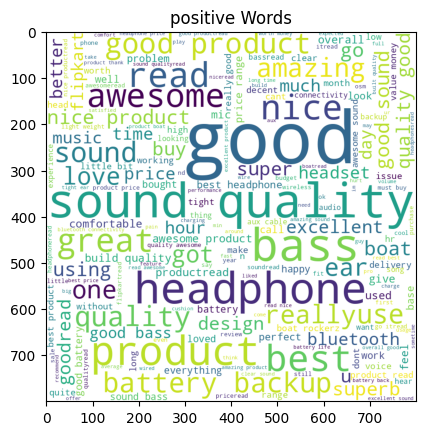

In [23]:
plt.imshow(positive_cloud)
plt.title("positive Words")

Text(0.5, 1.0, 'negitive Words')

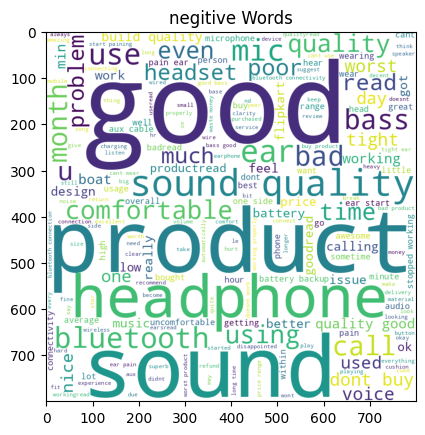

In [24]:
negative_cloud = wordcloud.generate(" ".join(df[df["sentiment"] ==1]["clean_review"]))
plt.imshow(negative_cloud)
plt.title("negitive Words")

In [25]:
# remove consecutive repeating words
def rem_consecutive(review):
  try:
    result = []
    review_list = review.split()
    result.append(review_list[0])
    for word in review_list[1:]:
      if result[-1] != word:
        result.append(word)
    return (" ".join(result))
  except:
    print(review)


In [26]:
df["final_text"] = df["clean_review"].apply(lambda x :rem_consecutive(x))

In [27]:
df[df["final_text"].isnull()]

,review,rating,sentiment,clean_review,final_text
2598,Very nice.READ MORE,5,0,,None
3072,Satisfactory.READ MORE,4,0,,None
3224,Very very nice....Clear sound.....Like...........,5,0,,None
3476,Good.READ MORE,4,0,,None
3152,Awesome..READ MORE,5,0,,None
3339,Best.READ MORE,5,0,,None
5676,amazing......READ MORE,5,0,,None
4420,Very nice...READ MORE,5,0,,None
4120,Good...READ MORE,4,0,,None
5386,This is very nice.READ MORE,3,1,,None


In [28]:
# final_df
final_df = df[["final_text","sentiment"]]
final_df.isnull().sum()

final_text    20
sentiment      0
dtype: int64

In [29]:
# remove Null Valuse
final_df.dropna(inplace = True)

<ipython-input-29-2c6276789b26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace = True)


In [30]:
# checking Duplicates
final_df["final_text"].duplicated().sum()

283

In [31]:
# removing Duplicates
final_df.drop_duplicates(subset = ["final_text"],inplace = True)

<ipython-input-31-1bda2040da3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop_duplicates(subset = ["final_text"],inplace = True)


In [32]:
final_df.shape

(4315, 2)

In [33]:
final_df["sentiment"].value_counts(1)

0    0.635226
1    0.364774
Name: sentiment, dtype: float64

In [34]:
# export cleaned Data to csv
final_df.to_csv("Flipkart Review Clean.csv",index = False)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

bow= CountVectorizer()
X = bow.fit_transform(final_df["final_text"].values)
bow_df = pd.DataFrame(columns = bow.get_feature_names_out(), data =X.toarray())
bow_df["sentiment"] = final_df["sentiment"].values
bow_df.shape

(4315, 4972)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def result(model, df):
  X = df.drop(columns = "sentiment")
  y = df["sentiment"]
  X_train, X_test, y_train, y_test = train_test_split(
      X,y, random_state = 42, stratify=y, test_size = 0.25
  )
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print("Train classification report: ")
  print(classification_report(y_train, y_pred_train))
  print("-----------------------------------")
  print("Test classification report: ")
  print(classification_report(y_test, y_pred_test))
  return model


In [37]:
model_rf = RandomForestClassifier()
model_nb = MultinomialNB()
result(model_rf,bow_df)

Train classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2056
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      3236
   macro avg       1.00      1.00      1.00      3236
weighted avg       1.00      1.00      1.00      3236

-----------------------------------
Test classification report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       685
           1       0.77      0.71      0.74       394

    accuracy                           0.81      1079
   macro avg       0.80      0.79      0.80      1079
weighted avg       0.81      0.81      0.81      1079



RandomForestClassifier()

In [38]:
result(model_nb,bow_df)

Train classification report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2056
           1       0.91      0.83      0.87      1180

    accuracy                           0.91      3236
   macro avg       0.91      0.89      0.90      3236
weighted avg       0.91      0.91      0.91      3236

-----------------------------------
Test classification report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       685
           1       0.79      0.71      0.75       394

    accuracy                           0.83      1079
   macro avg       0.82      0.80      0.81      1079
weighted avg       0.83      0.83      0.83      1079



MultinomialNB()

# TF_IDF Vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(final_df["final_text"])
tf_idf_df = pd.DataFrame(X.toarray(), columns = tf_idf.get_feature_names_out())
tf_idf_df["sentiment"] = final_df["sentiment"].values
tf_idf_df.head()

,aa,aacha,aakash,aata,abd,able,abov,abovehas,absolute,absolutely,...,zabardast,zabarjast,zeb,zebronics,zenfone,zero,zerozerozerozero,zoom,zoomread,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
result(model_rf,tf_idf_df)

In [ ]:
result(model_nb,tf_idf_df)

## Prediction Using BOW Navie Bayse

In [ ]:
test_review = '''Picture Quality is good.
sound is decent.
Coming to connectivity
Bluetooth connection is very weak.
my headset keeps on loosing signal the sound in my headset distorts every now and then i tried changing headset but issue remains the same.
the distance between tv and Bluetooth headset would be around 6 or 8 feet.
WiFi is poor as at times wifi looses connection and vidoes keeps on buffering even YouTube.
I have 12mbps plan and i expect atleast YouTube should work but, this doesn't goes with it.
wifi on my other devices works like charm but not on this tv.
even Chromecast is poor.
after every 10 or 20mins Chromecast disconnect automatically.
even at times watching shows online my Tv hangs and it restarts automatically.
i was really happy while purchasing this product but as the issue arrived now i doubt my idea about getting this product.
Even anyone of you find the same issue like me
please report it to Xiaomi like i did and support my review.'''
text1 = text_cleaner(test_review)
test_data = bow.transform([text1]).toarray()
model_nb.predict(test_data)


## implement Using Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('nb',MultinomialNB())])
pipe

In [ ]:
X= final_df.drop(columns = ["sentiment"])
y = final_df["sentiment"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,random_state = 42,test_size = 0.25,stratify = y
)

pipe.fit(X_train['final_text'],y_train)

In [ ]:
def prediction(text):
  text = text_cleaner(text)
  y_pred = pipe.predict([text])
  return y_pred

In [ ]:
prediction('''Picture Quality is good.
sound is decent.
Coming to connectivity
Bluetooth connection is very weak.
my headset keeps on loosing signal the sound in my headset distorts every now and then i tried changing headset but issue remains the same.
the distance between tv and Bluetooth headset would be around 6 or 8 feet.
WiFi is poor as at times wifi looses connection and vidoes keeps on buffering even YouTube.
I have 12mbps plan and i expect atleast YouTube should work but, this doesn't goes with it.
wifi on my other devices works like charm but not on this tv.
even Chromecast is poor.
after every 10 or 20mins Chromecast disconnect automatically.
even at times watching shows online my Tv hangs and it restarts automatically.
i was really happy while purchasing this product but as the issue arrived now i doubt my idea about getting this product.
Even anyone of you find the same issue like me
please report it to Xiaomi like i did and support my review.''')

In [ ]:
import joblib
joblib.dump(pipe,"flipkart_review,joblib")